In [1]:
import pandas as pd
import numpy as np
import spacy
import gensim
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
data = pd.read_csv('https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv', nrows = 20000)

In [3]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Preparing the data for topic modeling

- Get the word tokens and remove the stopwords
- Lemmetize the words
- Stream of document vectors or sparse matrix of shape (num_documents, num_terms)
  (basically list of list)

In [4]:
nlp = spacy.load('en_core_web_sm')
data['news_tokens'] = data['headline_text'].apply(lambda x: [y.lemma_ for y in nlp(x) if not y.is_stop])

In [5]:
data['news_tokens'].head()

0     [aba, decide, community, broadcasting, licence]
1             [act, fire, witness, aware, defamation]
2       [g, call, infrastructure, protection, summit]
3           [air, nz, staff, aust, strike, pay, rise]
4    [air, nz, strike, affect, australian, traveller]
Name: news_tokens, dtype: object

In [6]:
# id2word value
# We will create a dictionary to list all the words with a unique id
dictionary = gensim.corpora.Dictionary(data['news_tokens'])

In [7]:
# This is how our dictionary looks like
iterable = iter(dictionary.items())
for i in range(5):
    print(next(iterable))

(0, 'aba')
(1, 'broadcasting')
(2, 'community')
(3, 'decide')
(4, 'licence')


In [8]:
'''
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=3000)

In [9]:
len(dictionary)

1394

In [10]:
# Creating our bag-of-words representation
bow_corpus = [dictionary.doc2bow(doc) for doc in data['news_tokens']]
print(bow_corpus[:5])

[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(10, 1), (12, 1), (16, 1), (17, 1), (18, 1), (19, 1)]]


In [11]:
# Creating our tf-idf representation
from gensim import models
tfidf = models.tfidfmodel.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]
print(tfidf_corpus)

In [12]:
# Seeing the results of our tfidf corpus
from pprint import pprint
for doc in tfidf_corpus:
    pprint(doc)
    break

[(0, 0.48734602979579555), (1, 0.5820914811143669), (2, 0.6508942731783389)]


In [13]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [14]:
pprint(lda_model.print_topics())

[(0,
  '0.020*"health" + 0.016*"seek" + 0.015*"report" + 0.014*"consider" + '
  '0.014*"boost" + 0.012*"mp" + 0.011*"worker" + 0.010*"nt" + 0.010*"tourism" '
  '+ 0.009*"urge"'),
 (1,
  '0.023*"set" + 0.020*"budget" + 0.015*"iraq" + 0.014*"return" + 0.013*"war" '
  '+ 0.013*"australian" + 0.012*"urge" + 0.011*"easter" + 0.009*"hold" + '
  '0.009*"offer"'),
 (2,
  '0.044*"govt" + 0.021*"kill" + 0.016*"nt" + 0.014*"sa" + 0.013*"nsw" + '
  '0.012*"close" + 0.011*"sydney" + 0.010*"win" + 0.010*"crash" + '
  '0.009*"urge"'),
 (3,
  '0.031*"new" + 0.024*"cup" + 0.018*"world" + 0.014*"toll" + 0.013*"say" + '
  '0.012*"rise" + 0.012*"hit" + 0.012*"anzac" + 0.011*"final" + 0.008*"pay"'),
 (4,
  '0.033*"claim" + 0.018*"sars" + 0.013*"doctor" + 0.012*"govt" + 0.011*"red" '
  '+ 0.011*"injury" + 0.011*"continue" + 0.009*"green" + 0.009*"nuclear" + '
  '0.009*"question"'),
 (5,
  '0.030*"sars" + 0.013*"service" + 0.013*"man" + 0.013*"police" + 0.012*"qld" '
  '+ 0.009*"appeal" + 0.009*"g" + 0.009*"

In [15]:
'''
Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
'''

lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corpus, 
                                       num_topics=10, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [16]:
pprint(lda_model.print_topics())

[(0,
  '0.020*"health" + 0.016*"seek" + 0.015*"report" + 0.014*"consider" + '
  '0.014*"boost" + 0.012*"mp" + 0.011*"worker" + 0.010*"nt" + 0.010*"tourism" '
  '+ 0.009*"urge"'),
 (1,
  '0.023*"set" + 0.020*"budget" + 0.015*"iraq" + 0.014*"return" + 0.013*"war" '
  '+ 0.013*"australian" + 0.012*"urge" + 0.011*"easter" + 0.009*"hold" + '
  '0.009*"offer"'),
 (2,
  '0.044*"govt" + 0.021*"kill" + 0.016*"nt" + 0.014*"sa" + 0.013*"nsw" + '
  '0.012*"close" + 0.011*"sydney" + 0.010*"win" + 0.010*"crash" + '
  '0.009*"urge"'),
 (3,
  '0.031*"new" + 0.024*"cup" + 0.018*"world" + 0.014*"toll" + 0.013*"say" + '
  '0.012*"rise" + 0.012*"hit" + 0.012*"anzac" + 0.011*"final" + 0.008*"pay"'),
 (4,
  '0.033*"claim" + 0.018*"sars" + 0.013*"doctor" + 0.012*"govt" + 0.011*"red" '
  '+ 0.011*"injury" + 0.011*"continue" + 0.009*"green" + 0.009*"nuclear" + '
  '0.009*"question"'),
 (5,
  '0.030*"sars" + 0.013*"service" + 0.013*"man" + 0.013*"police" + 0.012*"qld" '
  '+ 0.009*"appeal" + 0.009*"g" + 0.009*"

In [17]:
'''
Check which topic our test document belongs to using the LDA Bag of Words model.
'''
document_num = 3001

print(data['headline_text'][document_num])
print('_ _' * 10)

# Our test document is document number 2000
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

brogden pledges cut in hospital waiting lists
_ __ __ __ __ __ __ __ __ __ _

Score: 0.4115631878376007	 
Topic: 0.031*"new" + 0.024*"cup" + 0.018*"world" + 0.014*"toll" + 0.013*"say" + 0.012*"rise" + 0.012*"hit" + 0.012*"anzac" + 0.011*"final" + 0.008*"pay"

Score: 0.2617284059524536	 
Topic: 0.026*"g" + 0.016*"baghdad" + 0.012*"police" + 0.011*"pm" + 0.009*"continue" + 0.009*"new" + 0.009*"reject" + 0.009*"blast" + 0.008*"law" + 0.008*"team"

Score: 0.20998741686344147	 
Topic: 0.023*"set" + 0.020*"budget" + 0.015*"iraq" + 0.014*"return" + 0.013*"war" + 0.013*"australian" + 0.012*"urge" + 0.011*"easter" + 0.009*"hold" + 0.009*"offer"

Score: 0.016676975414156914	 
Topic: 0.030*"sars" + 0.013*"service" + 0.013*"man" + 0.013*"police" + 0.012*"qld" + 0.009*"appeal" + 0.009*"g" + 0.009*"die" + 0.009*"death" + 0.009*"clear"

Score: 0.01667683757841587	 
Topic: 0.044*"govt" + 0.021*"kill" + 0.016*"nt" + 0.014*"sa" + 0.013*"nsw" + 0.012*"close" + 0.011*"sydney" + 0.010*"win" + 0.010*"crash"

In [18]:
# Compute Perplexity
# Will teach this when he teaches nlp - perplexity and coherence score
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['news_tokens'], dictionary = dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.421085423136717

Coherence Score:  0.5007233479755087


Output:
- Lower the perplexity better the model.
- Higher the topic coherence, the topic is more human interpretable.

In [19]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.001802 -0.195935       1        1  11.093840
0     -0.144702  0.095993       2        1  10.734177
6     -0.065026  0.063552       3        1  10.545498
8      0.173511 -0.047169       4        1  10.325522
3      0.157238  0.085697       5        1   9.959532
2     -0.016193  0.002100       6        1   9.934676
1      0.066925  0.110670       7        1   9.558251
7     -0.040658 -0.098162       8        1   9.551643
4     -0.069221 -0.001038       9        1   9.223028
5     -0.060073 -0.015709      10        1   9.073833, topic_info=          Term        Freq       Total Category  logprob  loglift
203        man  499.000000  499.000000  Default  30.0000  30.0000
1390      sars  367.000000  367.000000  Default  29.0000  29.0000
121       govt  587.000000  587.000000  Default  28.0000  28.0000
40        plan  463.000000  463.000000  Default  27.0000  27.0000
7            g  237.000000  237.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
121       govt   54.304996  587.623533  Topic10  -4.7949   0.0183
92    decision   36.209616  128.972971  Topic10  -5.2002   1.1295
1039    budget   38.187131  228.441988  Topic10  -5.1470   0.6110
127        nsw   34.276915  242.148083  Topic10  -5.2551   0.4447
58        urge   34.152671  348.028112  Topic10  -5.2587   0.0783

[637 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
861       3  0.020208    12
861       4  0.020208    12
861       5  0.040417    12
861       7  0.666879    12
861      10  0.222293    12
...     ...       ...   ...
734       6  0.033742  year
734       7  0.269933  year
734       8  0.195701  year
734       9  0.013497  year
734      10  0.013497  year

[2819 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 7, 9, 4, 3, 2, 8, 5, 6])

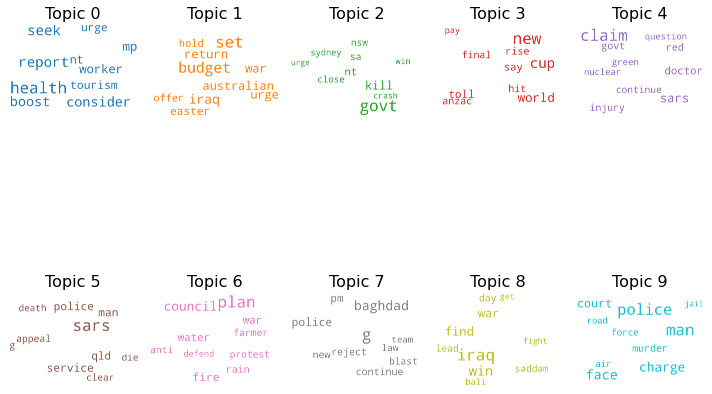

In [21]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

stop_words = stopwords.words('english')

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()